In [1]:
import numpy as np
import pandas as pd
import os
from collections import OrderedDict
import seaborn
from matplotlib import pyplot as plt
import scipy
from functools import reduce
import openpyxl
import pingouin as pg

In [2]:
table_results1 = pd.read_csv('AG1n_1.tif_BA_results.csv')
table_results1

,,Area,Mean,%Area
0,1,0.778,1.172,0.123


In [3]:
area1 = table_results1.loc[0,"Area"]
print(area1)

0.778


In [4]:
table_summary1 = pd.read_csv('AG1n_1.tif_BA_summary.txt', sep='\t')
table_summary1

,Slice,Count,Total Area,Average Size,%Area,Mean
0,Result of 1,24,0.000956,0.00004,0.123,48.761


In [5]:
count1 = table_summary1.loc[0,"Count"]
print(count1)

24


In [6]:
# create a list of files, from which we'll select parameters of interest

file_names = os.listdir()

extensions_of_interest = ["_summary.txt", "_results.csv"]

# This part renames files with lowercase names eg. Ag1n_1.tif_BA -> AG1n_1.tif_BA
files_lower_case = []
for name in file_names:
        if name.endswith(tuple(extensions_of_interest)):
            if name[1].islower():
                name_upper = name[:2].upper() + name[2:]
                #os.rename(name, name_upper)


summary_and_results_files = []
for names in file_names:
    if names.endswith(tuple(extensions_of_interest)):
        summary_and_results_files.append(names)
summary_and_results_files

['KL2o_1.tif_CeL_results.csv',
 'KL2o_1.tif_CeL_summary.txt',
 'KL2o_1.tif_ME_results.csv',
 'KL2o_1.tif_ME_summary.txt',
 'KL2o_2.tif_LA_results.csv',
 'KL2o_2.tif_LA_summary.txt',
 'KL2o_2.tif_BA_results.csv',
 'KL2o_2.tif_BA_summary.txt',
 'KL2o_2.tif_CeM_results.csv',
 'KL2o_2.tif_CeM_summary.txt',
 'KL2o_2.tif_CeL_results.csv',
 'KL2o_2.tif_CeL_summary.txt',
 'KL2o_2.tif_ME_results.csv',
 'KL2o_2.tif_ME_summary.txt',
 'KL2o_3.tif_LA_results.csv',
 'KL2o_3.tif_LA_summary.txt',
 'KL2o_3.tif_BA_results.csv',
 'KL2o_3.tif_BA_summary.txt',
 'KL2o_3.tif_CeM_results.csv',
 'KL2o_3.tif_CeM_summary.txt',
 'KL2o_3.tif_CeL_results.csv',
 'KL2o_3.tif_CeL_summary.txt',
 'KL2o_3.tif_ME_results.csv',
 'KL2o_3.tif_ME_summary.txt',
 'KL2o_4.tif_LA_results.csv',
 'KL2o_4.tif_LA_summary.txt',
 'KL2o_4.tif_BA_results.csv',
 'KL2o_4.tif_BA_summary.txt',
 'KL2o_4.tif_CeM_results.csv',
 'KL2o_4.tif_CeM_summary.txt',
 'KL2o_4.tif_CeL_results.csv',
 'KL2o_4.tif_CeL_summary.txt',
 'KL2o_4.tif_ME_results.cs

In [7]:
# create ID list

def IDs_list():
    global IDs
    IDs = []
    for ID in summary_and_results_files:
        if '_results.csv' in ID:
            short_ID = ID.replace("_results.csv", "")
        else:
            short_ID = ID.replace("_summary.txt", "")
        IDs.append(short_ID)
    IDs = np.unique(IDs)
    IDs = IDs.tolist()
    return IDs

IDs_list()

['AG1n_1.tif_BA',
 'AG1n_1.tif_CeL',
 'AG1n_1.tif_CeM',
 'AG1n_1.tif_ME',
 'AG1n_2.tif_BA',
 'AG1n_2.tif_CeL',
 'AG1n_2.tif_CeM',
 'AG1n_2.tif_LA',
 'AG1n_2.tif_ME',
 'AG1n_3.tif_BA',
 'AG1n_3.tif_CeL',
 'AG1n_3.tif_CeM',
 'AG1n_3.tif_LA',
 'AG1n_3.tif_ME',
 'AG1n_4.tif_BA',
 'AG1n_4.tif_CeL',
 'AG1n_4.tif_CeM',
 'AG1n_4.tif_ME',
 'AG1o_1.tif_BA',
 'AG1o_1.tif_CeL',
 'AG1o_1.tif_CeM',
 'AG1o_1.tif_LA',
 'AG1o_1.tif_ME',
 'AG1o_2.tif_BA',
 'AG1o_2.tif_CeL',
 'AG1o_2.tif_CeM',
 'AG1o_2.tif_ME',
 'AG1o_3.tif_BA',
 'AG1o_3.tif_CeL',
 'AG1o_3.tif_CeM',
 'AG1o_3.tif_ME',
 'AG1o_4.tif_BA',
 'AG1o_4.tif_CeL',
 'AG1o_4.tif_CeM',
 'AG1o_4.tif_LA',
 'AG1o_4.tif_ME',
 'AG2n_1.tif_BA',
 'AG2n_1.tif_CeL',
 'AG2n_1.tif_CeM',
 'AG2n_1.tif_LA',
 'AG2n_1.tif_ME',
 'AG2n_2.tif_BA',
 'AG2n_2.tif_CeL',
 'AG2n_2.tif_CeM',
 'AG2n_2.tif_LA',
 'AG2n_2.tif_ME',
 'AG2n_3.tif_BA',
 'AG2n_3.tif_CeL',
 'AG2n_3.tif_CeM',
 'AG2n_3.tif_LA',
 'AG2o_1.tif_BA',
 'AG2o_1.tif_CeL',
 'AG2o_1.tif_CeM',
 'AG2o_1.tif_LA',
 'AG

In [8]:
# a trial df with calues for the first file

data1 = {'ID': IDs[0], 'Count': count1, 'Area':area1}
df_temporary1 = pd.DataFrame(data1, index=[0])
df_temporary1

,ID,Count,Area
0,AG1n_1.tif_BA,24,0.778


In [9]:
# create df with Count & Area values for each file

n=0
df_all_data = pd.DataFrame()

for ID in IDs:
    
    table_results = pd.read_csv(ID + '_results.csv')
    area = table_results.loc[0,"Area"]
    table_summary = pd.read_csv(ID + '_summary.txt', sep='\t')
    count = table_summary.loc[0, "Count"]
    
    data = {'ID': ID, 'Count': count, 'Area': area}
    df_temporary = pd.DataFrame(data, index=[n])
    #df_all_data = df_all_data.append(df_temporary) 
    df_all_data = pd.concat([df_all_data, df_temporary])
    
    n=n+1
    
df_all_data

/Users/aantosz/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,ID,Count,Area
0,AG1n_1.tif_BA,24,0.778
1,AG1n_1.tif_CeL,36,0.614
2,AG1n_1.tif_CeM,19,0.443
3,AG1n_1.tif_ME,106,0.993
4,AG1n_2.tif_BA,59,1.372
...,...,...,...
539,TJ2o_4.tif_BA,184,1.317
540,TJ2o_4.tif_CeL,79,0.454
541,TJ2o_4.tif_CeM,91,0.454
542,TJ2o_4.tif_LA,33,0.363


In [10]:
# for each brain section calculate mean density, remove extreme outliers and save all as xlsx table

pd.set_option('display.max_rows', None)

df_all_data['Density'] = df_all_data.Count/df_all_data.Area

df_all_data = df_all_data[df_all_data.ID != 'TJ1o_4.tif_CeL']
df_all_data = df_all_data[df_all_data.ID != 'TJ1o_4.tif_LA']
df_all_data = df_all_data[df_all_data.ID != 'TJ1n_1.tif_LA']
df_all_data = df_all_data[df_all_data.ID != 'TJ2n_1.tif_LA']

df_all_data.to_excel('eksport_tabelek/all_data.xlsx')
df_all_data = df_all_data.reset_index()
df_all_data

,index,ID,Count,Area,Density
0,0,AG1n_1.tif_BA,24,0.778,30.848329
1,1,AG1n_1.tif_CeL,36,0.614,58.631922
2,2,AG1n_1.tif_CeM,19,0.443,42.889391
3,3,AG1n_1.tif_ME,106,0.993,106.747231
4,4,AG1n_2.tif_BA,59,1.372,43.002915
5,5,AG1n_2.tif_CeL,67,0.674,99.406528
6,6,AG1n_2.tif_CeM,19,0.469,40.511727
7,7,AG1n_2.tif_LA,5,0.233,21.459227
8,8,AG1n_2.tif_ME,170,2.203,77.167499
9,9,AG1n_3.tif_BA,41,1.409,29.098652


In [11]:
# in new_df count and area are added: CeM, CeL and Me to create centromedial nucleus; 
# Ba and La to create a basolateral nucleus

import warnings
warnings.filterwarnings('ignore')

new_df = pd.DataFrame()
temporary_df = pd.DataFrame()
lst_dict = []

for element in range(len(df_all_data)):
    
    ID = df_all_data.ID[element]
    subject = '_'.join(ID.split('_')[:-1])
    part=ID.split('_')[-1]
    
    new_part = 'centromedial'
    if part == 'BA' or part == 'LA':
        new_part = 'basolateral'
        
    new_ID = subject + '_' + new_part
    
    lst_dict.append({'ID': new_ID, 'Count': df_all_data.Count[element], 'Area': df_all_data.Area[element], 'orig_part': part, 'part': new_part, 'group': subject[2]})
    new_df = temporary_df.append(lst_dict)
    


summed_df = new_df.groupby('ID', as_index=False).sum()

for element in range(len(summed_df)):
    summed_df['Density'] = summed_df['Count'] / summed_df['Area']
    ID = summed_df['ID'][element]
    summed_df.at[element, 'Nucleus'] = ID.split('_')[-1]  
        
summed_df.head()

,ID,Count,Area,Density,Nucleus
0,AG1n_1.tif_basolateral,24,0.778,30.848329,basolateral
1,AG1n_1.tif_centromedial,161,2.050,78.536585,centromedial
2,AG1n_2.tif_basolateral,64,1.605,39.875389,basolateral
3,AG1n_2.tif_centromedial,256,3.346,76.509265,centromedial
4,AG1n_3.tif_basolateral,54,1.837,29.395754,basolateral


In [12]:
new_df[(new_df['part']=='basolateral') & (new_df['group']=='2') & (new_df['orig_part'] == 'BA')]

,ID,Count,Area,orig_part,part,group
36,AG2n_1.tif_basolateral,59,1.526,BA,basolateral,2
41,AG2n_2.tif_basolateral,50,1.277,BA,basolateral,2
46,AG2n_3.tif_basolateral,82,0.823,BA,basolateral,2
50,AG2o_1.tif_basolateral,101,1.985,BA,basolateral,2
55,AG2o_2.tif_basolateral,79,0.930,BA,basolateral,2
59,AG2o_3.tif_basolateral,128,1.900,BA,basolateral,2
64,AG2o_4.tif_basolateral,81,1.191,BA,basolateral,2
107,AH2n_1.tif_basolateral,176,1.995,BA,basolateral,2
112,AH2n_2.tif_basolateral,23,0.810,BA,basolateral,2
117,AH2n_4.tif_basolateral,123,1.459,BA,basolateral,2


In [13]:
# add the group column

for element in range(len(summed_df)):
    group_marker = summed_df.ID[element][2]
    
    if group_marker == '1':
        summed_df.at[element, 'Group'] = 'contr'
    elif group_marker == '2':
        summed_df.at[element, 'Group'] = 'exp'        
        
summed_df.head()

,ID,Count,Area,Density,Nucleus,Group
0,AG1n_1.tif_basolateral,24,0.778,30.848329,basolateral,contr
1,AG1n_1.tif_centromedial,161,2.050,78.536585,centromedial,contr
2,AG1n_2.tif_basolateral,64,1.605,39.875389,basolateral,contr
3,AG1n_2.tif_centromedial,256,3.346,76.509265,centromedial,contr
4,AG1n_3.tif_basolateral,54,1.837,29.395754,basolateral,contr


In [14]:
mean_densities = summed_df.groupby(['Group', 'Nucleus'], as_index=False).mean()
mean_densities

,Group,Nucleus,Count,Area,Density
0,contr,basolateral,62.081967,1.614754,37.682242
1,contr,centromedial,195.360656,2.959033,67.958388
2,exp,basolateral,86.672727,1.658964,52.886586
3,exp,centromedial,239.576923,2.981231,85.631034


In [15]:
for x in summed_df:
    summed_df['Rat'] = summed_df['ID'].str[:3]
summed_df.head()

,ID,Count,Area,Density,Nucleus,Group,Rat
0,AG1n_1.tif_basolateral,24,0.778,30.848329,basolateral,contr,AG1
1,AG1n_1.tif_centromedial,161,2.050,78.536585,centromedial,contr,AG1
2,AG1n_2.tif_basolateral,64,1.605,39.875389,basolateral,contr,AG1
3,AG1n_2.tif_centromedial,256,3.346,76.509265,centromedial,contr,AG1
4,AG1n_3.tif_basolateral,54,1.837,29.395754,basolateral,contr,AG1


In [16]:
summed_df['Group'] = summed_df['Group'].str.replace('contr','CTRL')
summed_df['Group'] = summed_df['Group'].str.replace('exp','EXP')

In [17]:
summed_df_centromedial = summed_df.loc[summed_df['Nucleus'] == 'centromedial']
summed_df_basolateral = summed_df.loc[summed_df['Nucleus'] == 'basolateral']

In [18]:
summed_df_centromedial = summed_df_centromedial.pivot(index = ['ID', 'Nucleus'], columns = 'Group', values = 'Density')
summed_df_centromedial = summed_df_centromedial.reset_index()

summed_df_basolateral = summed_df_basolateral.pivot(index = ['ID', 'Nucleus'], columns = 'Group', values = 'Density')
summed_df_basolateral = summed_df_basolateral.reset_index()

In [19]:
len(summed_df_centromedial[summed_df_centromedial['CTRL'].notnull()])

61

In [20]:
summed_df_centromedial

Group,ID,Nucleus,CTRL,EXP
0,AG1n_1.tif_centromedial,centromedial,78.536585,NaN
1,AG1n_2.tif_centromedial,centromedial,76.509265,NaN
2,AG1n_3.tif_centromedial,centromedial,65.746022,NaN
3,AG1n_4.tif_centromedial,centromedial,117.346939,NaN
4,AG1o_1.tif_centromedial,centromedial,85.342200,NaN
5,AG1o_2.tif_centromedial,centromedial,105.331599,NaN
6,AG1o_3.tif_centromedial,centromedial,65.480427,NaN
7,AG1o_4.tif_centromedial,centromedial,94.808126,NaN
8,AG2n_1.tif_centromedial,centromedial,NaN,43.514644
9,AG2n_2.tif_centromedial,centromedial,NaN,65.411910


In [21]:
pg.ttest(summed_df_centromedial.CTRL, summed_df_centromedial.EXP)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.203138,87.261517,two-sided,0.03022,"[-33.62, -1.73]",0.428459,1.728,0.614266


In [22]:
pg.ttest(summed_df_basolateral.CTRL, summed_df_basolateral.EXP)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.571386,89.888897,two-sided,0.011771,"[-26.95, -3.46]",0.488809,3.698,0.741065


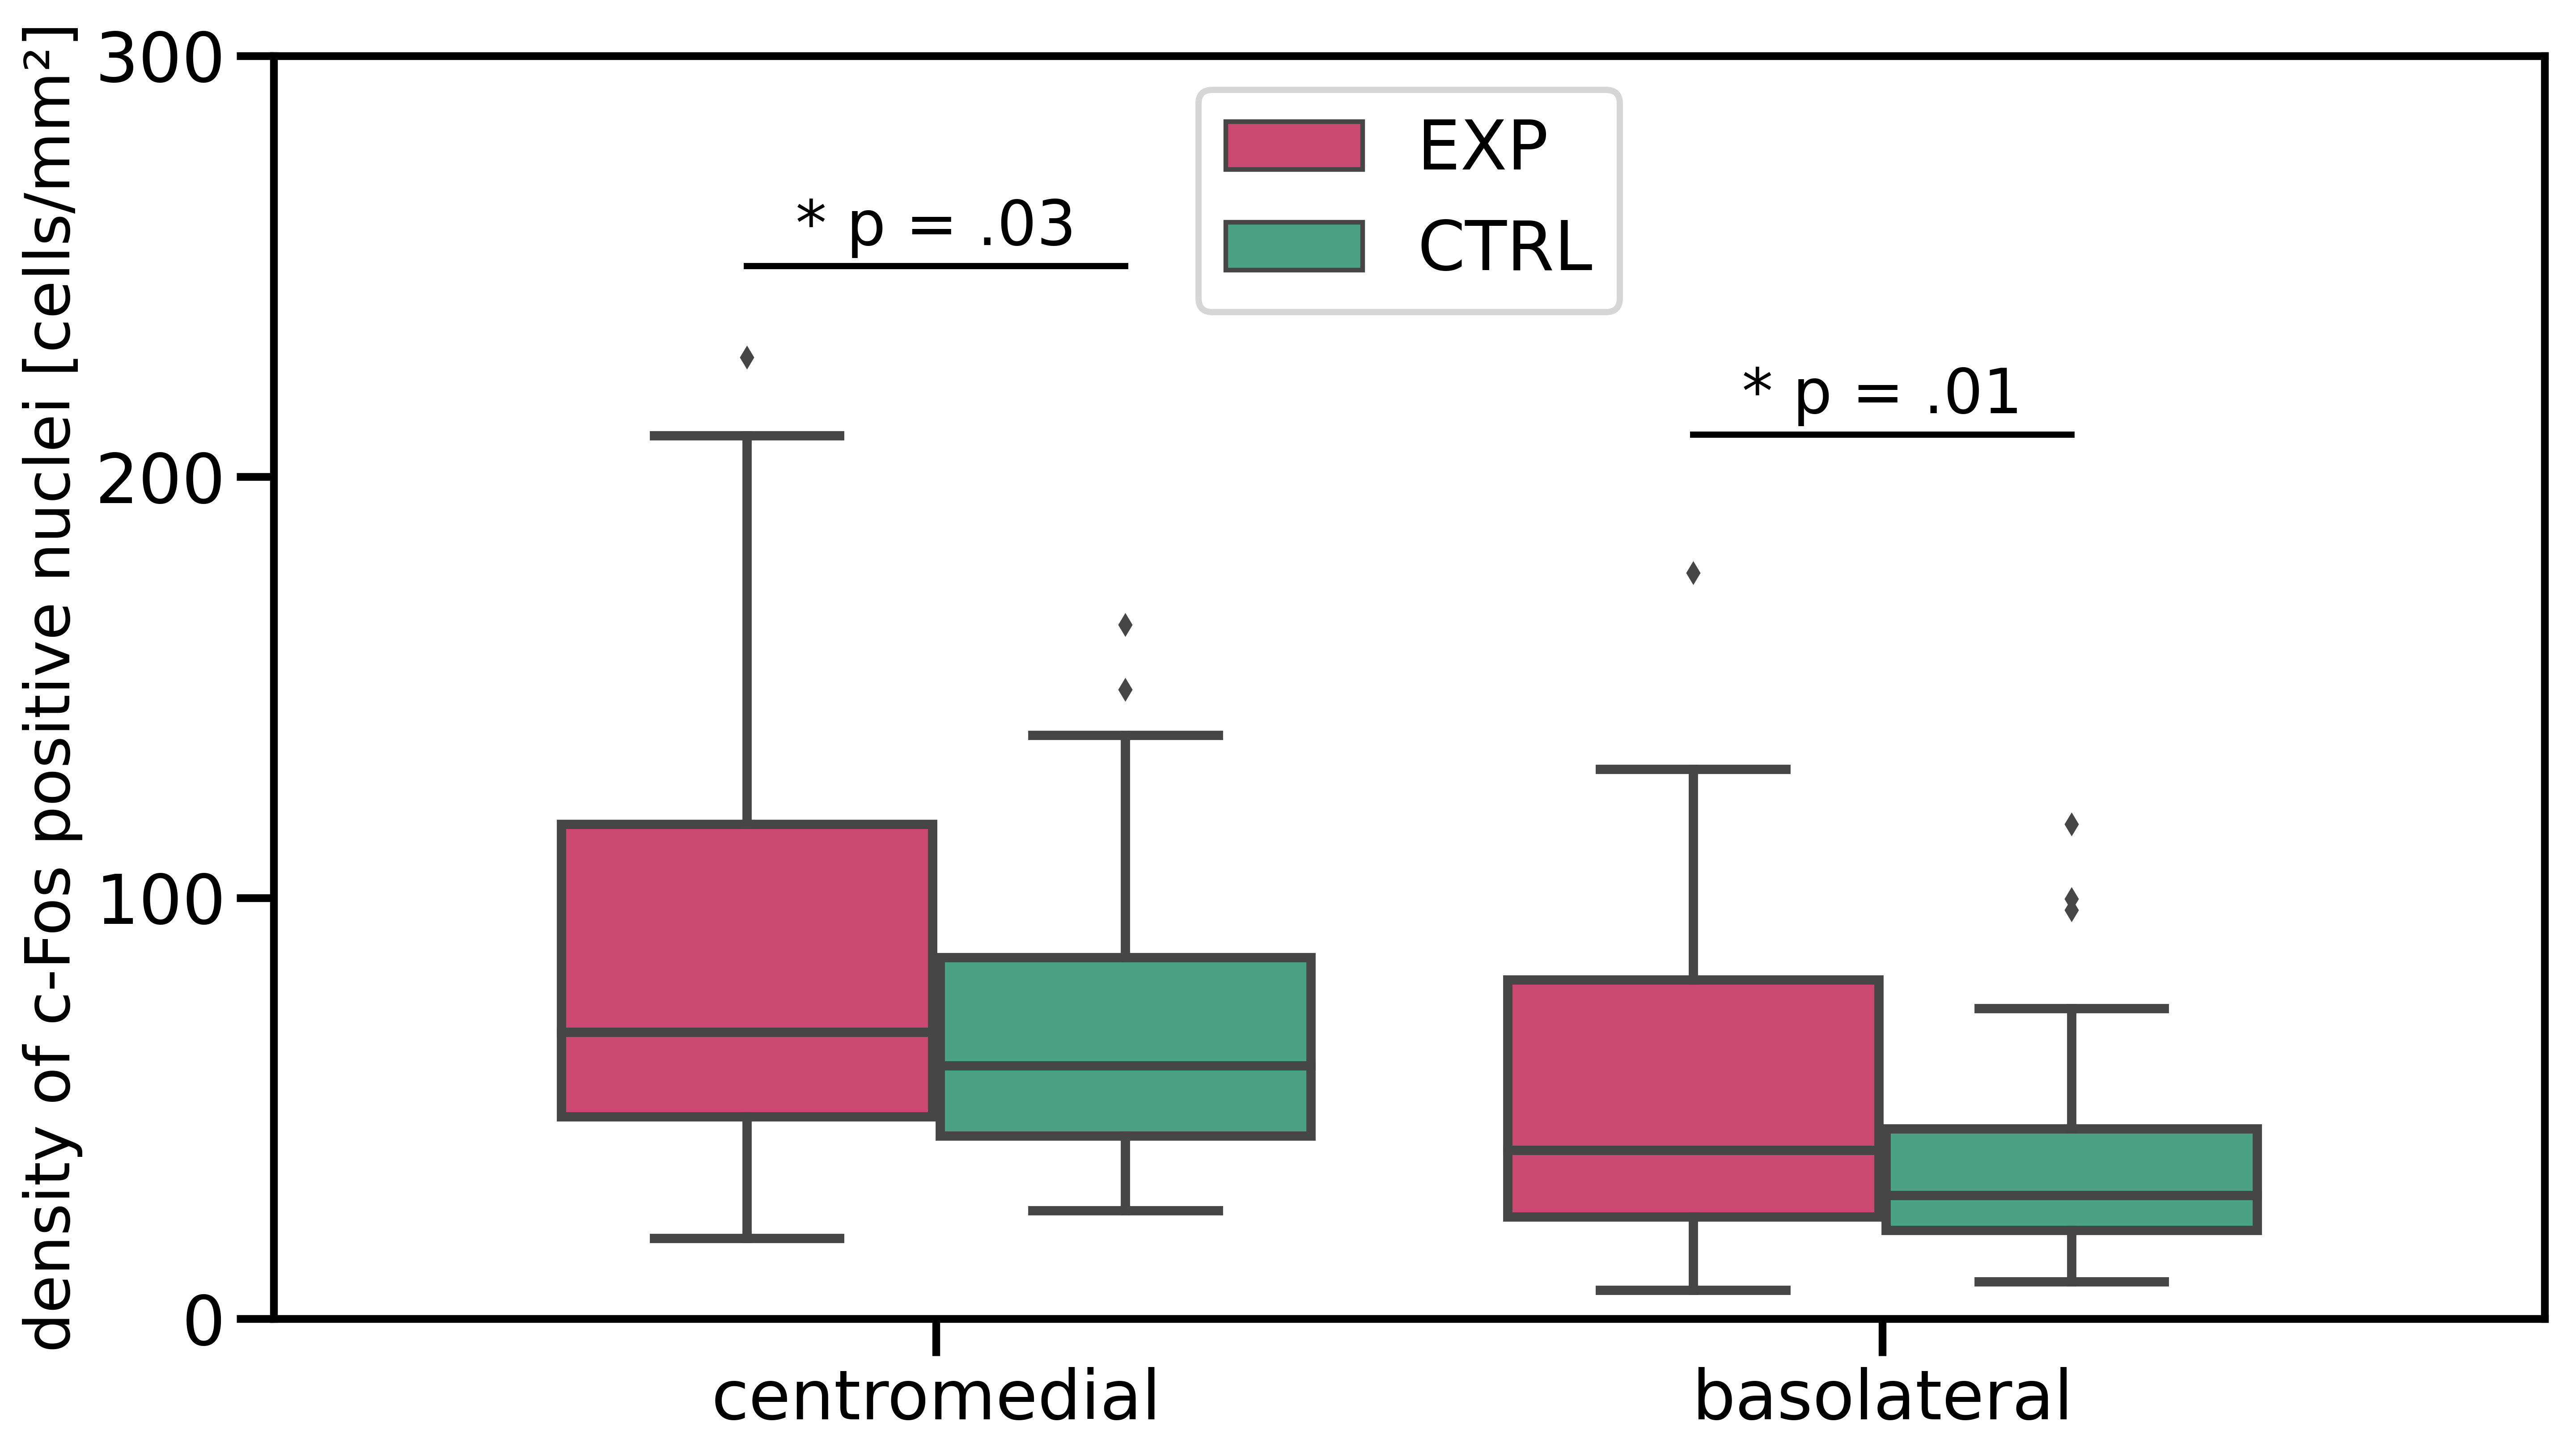

In [23]:
plt.figure(figsize=(12, 7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.boxplot(x="Nucleus", y="Density", hue="Group", hue_order=["EXP", "CTRL"],
                     data=summed_df, order=['centromedial', 'basolateral'], palette=pal_1, fliersize = 4)

plt.xlabel("")#"part of the amygdala", fontsize=18)
plt.ylabel("density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=20)
plt.xticks(fontsize=22, ticks=[0,1], labels=['centromedial', 'basolateral'])
plt.yticks(fontsize=22)

plt.legend(loc = 'upper center')

plt.plot([-0.2,-0.2,0.2,0.2], [250,250,250,250], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((-0.2+0.2)*.5, 250+2, "* p = .03", ha='center', va='bottom', color='k', fontsize=20)
plt.plot([0.8,0.8,1.2,1.2], [210, 210, 210, 210], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((0.8+1.2)*.5, 210+2, "* p = .01", ha='center', va='bottom', color='k', fontsize=20)


plt.ylim(0,300)
plt.yticks([0, 100, 200, 300])

plt.tight_layout()
plt.savefig('wykresy/boxplot_baso_centro.tiff')
plt.show()

In [24]:
# create a table for analysis in R

grupy = ['EXP', 'CON']
osoby = ['AG', 'AH', 'AK', 'KG', 'KL', 'KT', 'RK', 'RP', 'TJ']
nucleusy = ['LA', 'BA', 'CeL', 'CeM', 'ME']
ordery = ['o', 'n']
skrawki = ['1', '2', '3', '4']

df_all_data_stats = pd.DataFrame()

for osoba in osoby:
    for grupa in grupy:
        for nucleus in nucleusy:
            for order in ordery:
                for skrawek in skrawki:
                    
                    znacznik_grupy = 0
                    if grupa == 'EXP':
                        znacznik_grupy = 2
                    elif grupa == 'CON':
                        znacznik_grupy = 1

                    id_str = osoba + str(znacznik_grupy) + order + '_' + skrawek + '.tif_' + nucleus
                    x = df_all_data[df_all_data.ID.str.contains(id_str, regex=True)]
                    
                    value = next(iter(x['Density'].values), None)
                    
                    code = osoba + '_' + grupa + '_' + order
                    
                    category = grupa + '_' + nucleus


                    data=OrderedDict({'ID': code, 'Code': osoba, 'Group': grupa, 'Nulceus': nucleus, 'Category': category, 'Order': order, 'Skrawek': skrawek, 'Density': value})
                    df_temporary = pd.DataFrame([data])
                    df_all_data_stats = df_all_data_stats.append(df_temporary)
                    df_all_data_stats = df_all_data_stats.fillna(np.nan)

df_all_data_stats.to_excel('all_data_stats.xlsx')                    
df_all_data_stats.head()

,ID,Code,Group,Nulceus,Category,Order,Skrawek,Density
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,1,73.705179
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,2,NaN
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,3,111.811024
0,AG_EXP_o,AG,EXP,LA,EXP_LA,o,4,NaN
0,AG_EXP_n,AG,EXP,LA,EXP_LA,n,1,22.491349


In [25]:
# create a table for df_plot

osoby = ['AG', 'AH', 'AK', 'KG', 'KL', 'KT', 'RK', 'RP', 'TJ']
grupy = ['1', '2']
ordery = ['o', 'n']
skrawki = ['1', '2', '3', '4']
nucleusy = ['LA', 'BA', 'CeL', 'CeM', 'ME']

df_all_data_stats3 = pd.DataFrame()

for osoba in osoby:
    for order in ordery:
        for skrawek in skrawki:

            x_exp_LA = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'LA', regex=True)]
            x_contr_LA = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'LA', regex=True)]
                
            value_exp_LA = next(iter(x_exp_LA['Density'].values), None)
            value_contr_LA = next(iter(x_contr_LA['Density'].values), None)
            
            
            x_exp_BA = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'BA', regex=True)]
            x_contr_BA = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'BA', regex=True)]
                
            value_exp_BA = next(iter(x_exp_BA['Density'].values), None)
            value_contr_BA = next(iter(x_contr_BA['Density'].values), None)
            
            
            x_exp_CeL = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'CeL', regex=True)]
            x_contr_CeL = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'CeL', regex=True)]
                
            value_exp_CeL = next(iter(x_exp_CeL['Density'].values), None)
            value_contr_CeL = next(iter(x_contr_CeL['Density'].values), None)
            
            
            x_exp_CeM = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'CeM', regex=True)]
            x_contr_CeM = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'CeM', regex=True)]
                
            value_exp_CeM = next(iter(x_exp_CeM['Density'].values), None)
            value_contr_CeM = next(iter(x_contr_CeM['Density'].values), None)
            
            
            x_exp_ME = df_all_data[df_all_data.ID.str.contains(osoba + '2' + order + '_' + skrawek + '.tif_' + 'ME', regex=True)]
            x_contr_ME = df_all_data[df_all_data.ID.str.contains(osoba + '1' + order + '_' + skrawek + '.tif_' + 'ME', regex=True)]
                
            value_exp_ME = next(iter(x_exp_ME['Density'].values), None)
            value_contr_ME = next(iter(x_contr_ME['Density'].values), None)
                

            data=OrderedDict({'Code': osoba, 'Order': order, 'Skrawek': skrawek, 'Density_EXP_LA': value_exp_LA, 'Density_EXP_BA': value_exp_BA, 'Density_EXP_CeL': value_exp_CeL, 'Density_EXP_CeM': value_exp_CeM,'Density_EXP_ME': value_exp_ME,
                             'Density_CONTR_LA': value_contr_LA, 'Density_CONTR_BA': value_contr_BA, 'Density_CONTR_CeL': value_contr_CeL, 'Density_CONTR_CeM': value_contr_CeM, 'Density_CONTR_ME': value_contr_ME})
            df_temporary = pd.DataFrame([data])
            df_all_data_stats3 = df_all_data_stats3.append(df_temporary)
            df_all_data_stats3 = df_all_data_stats3.fillna(np.nan)

df_all_data_stats3.to_csv('eksport_tabelek/all_data_stats3.csv')
df_all_data_stats3.to_excel('eksport_tabelek/all_data_stats3.xlsx')

In [26]:
df_all_data_stats3.head(10)

,Code,Order,Skrawek,Density_EXP_LA,Density_EXP_BA,Density_EXP_CeL,Density_EXP_CeM,Density_EXP_ME,Density_CONTR_LA,Density_CONTR_BA,Density_CONTR_CeL,Density_CONTR_CeM,Density_CONTR_ME
0,AG,o,1,73.705179,50.881612,122.315593,70.110701,129.339039,28.846154,47.368421,78.853047,34.433286,105.060241
0,AG,o,2,NaN,84.946237,100.158983,68.661972,163.883090,NaN,61.247216,76.519916,49.136786,156.318481
0,AG,o,3,111.811024,67.368421,151.069519,94.827586,70.616604,NaN,22.199798,55.806938,41.543027,80.787508
0,AG,o,4,NaN,68.010076,126.488095,86.900130,120.092379,42.525773,77.194753,120.833333,22.522523,101.703665
0,AG,n,1,22.491349,38.663172,48.543689,13.333333,48.747764,NaN,30.848329,58.631922,42.889391,106.747231
0,AG,n,2,20.618557,39.154268,38.461538,25.454545,99.547511,21.459227,43.002915,99.406528,40.511727,77.167499
0,AG,n,3,50.000000,99.635480,165.596919,116.279070,NaN,30.373832,29.098652,70.562293,21.592443,82.590612
0,AG,n,4,NaN,NaN,NaN,NaN,NaN,NaN,53.571429,103.756708,109.640832,126.582278
0,AH,o,1,NaN,NaN,NaN,NaN,NaN,13.297872,18.799711,25.029797,35.769829,68.032187
0,AH,o,2,NaN,NaN,NaN,NaN,NaN,20.325203,37.580202,61.224490,48.177083,78.481013


In [27]:
# create df_plot based on df_all_data_stats3 - data from every single section

df_plot = pd.melt(df_all_data_stats3, id_vars=['Code'], value_vars=['Density_EXP_LA', 'Density_EXP_BA', 'Density_EXP_CeL', 
                                                   'Density_EXP_CeM', 'Density_EXP_ME',
                                                  'Density_CONTR_LA', 'Density_CONTR_BA', 'Density_CONTR_CeL', 
                                                   'Density_CONTR_CeM', 'Density_CONTR_ME'])

def nucleus_from_row(row):
    return row['variable'].split('_')[-1]

def group_from_row(row):
    return row['variable'].split('_')[-2]

df_plot['Jądro ciała migdałowatego'] = df_plot.apply(nucleus_from_row, axis=1)

df_plot['Grupa'] = df_plot.apply(group_from_row, axis=1)

df_plot = df_plot.rename(columns={"value": "Gęstość występowania wybarwionych komórek"})
df_plot = df_plot.replace(["LA", "BA", "CeL", "CeM", "ME"], ["boczne", "podstawne", "środkowo-boczne", "środkowe", "przyśrodkowe"])
df_plot = df_plot.replace(["EXP", "CONTR"], ["gr. eksperymentalna", "gr. kontrolna"])
df_plot['Metoda'] = 'fos'
df_plot.head(10)

,Code,variable,Gęstość występowania wybarwionych komórek,Jądro ciała migdałowatego,Grupa,Metoda
0,AG,Density_EXP_LA,73.705179,boczne,gr. eksperymentalna,fos
1,AG,Density_EXP_LA,NaN,boczne,gr. eksperymentalna,fos
2,AG,Density_EXP_LA,111.811024,boczne,gr. eksperymentalna,fos
3,AG,Density_EXP_LA,NaN,boczne,gr. eksperymentalna,fos
4,AG,Density_EXP_LA,22.491349,boczne,gr. eksperymentalna,fos
5,AG,Density_EXP_LA,20.618557,boczne,gr. eksperymentalna,fos
6,AG,Density_EXP_LA,50.000000,boczne,gr. eksperymentalna,fos
7,AG,Density_EXP_LA,NaN,boczne,gr. eksperymentalna,fos
8,AH,Density_EXP_LA,NaN,boczne,gr. eksperymentalna,fos
9,AH,Density_EXP_LA,NaN,boczne,gr. eksperymentalna,fos


In [28]:
sem_data = df_plot.groupby(["Jądro ciała migdałowatego", "Grupa"])["Gęstość występowania wybarwionych komórek"].sem()
print(sem_data)
sem_data = sem_data.reindex(['boczne', 'podstawne', 'środkowo-boczne', 'środkowe', 'przyśrodkowe'], level='Jądro ciała migdałowatego')
sem_data = sem_data.reindex(['gr. kontrolna', 'gr. eksperymentalna'], level='Grupa')
sem_data = sem_data.values
sem_data

Jądro ciała migdałowatego  Grupa              
boczne                     gr. eksperymentalna    4.469236
                           gr. kontrolna          2.371850
podstawne                  gr. eksperymentalna    5.158059
                           gr. kontrolna          3.242354
przyśrodkowe               gr. eksperymentalna    7.721050
                           gr. kontrolna          5.415724
środkowe                   gr. eksperymentalna    6.273791
                           gr. kontrolna          4.567658
środkowo-boczne            gr. eksperymentalna    8.707382
                           gr. kontrolna          5.055776
Name: Gęstość występowania wybarwionych komórek, dtype: float64


array([2.37185024, 4.46923598, 3.24235449, 5.15805944, 5.05577572,
       8.70738244, 4.56765831, 6.27379082, 5.41572427, 7.72104993])

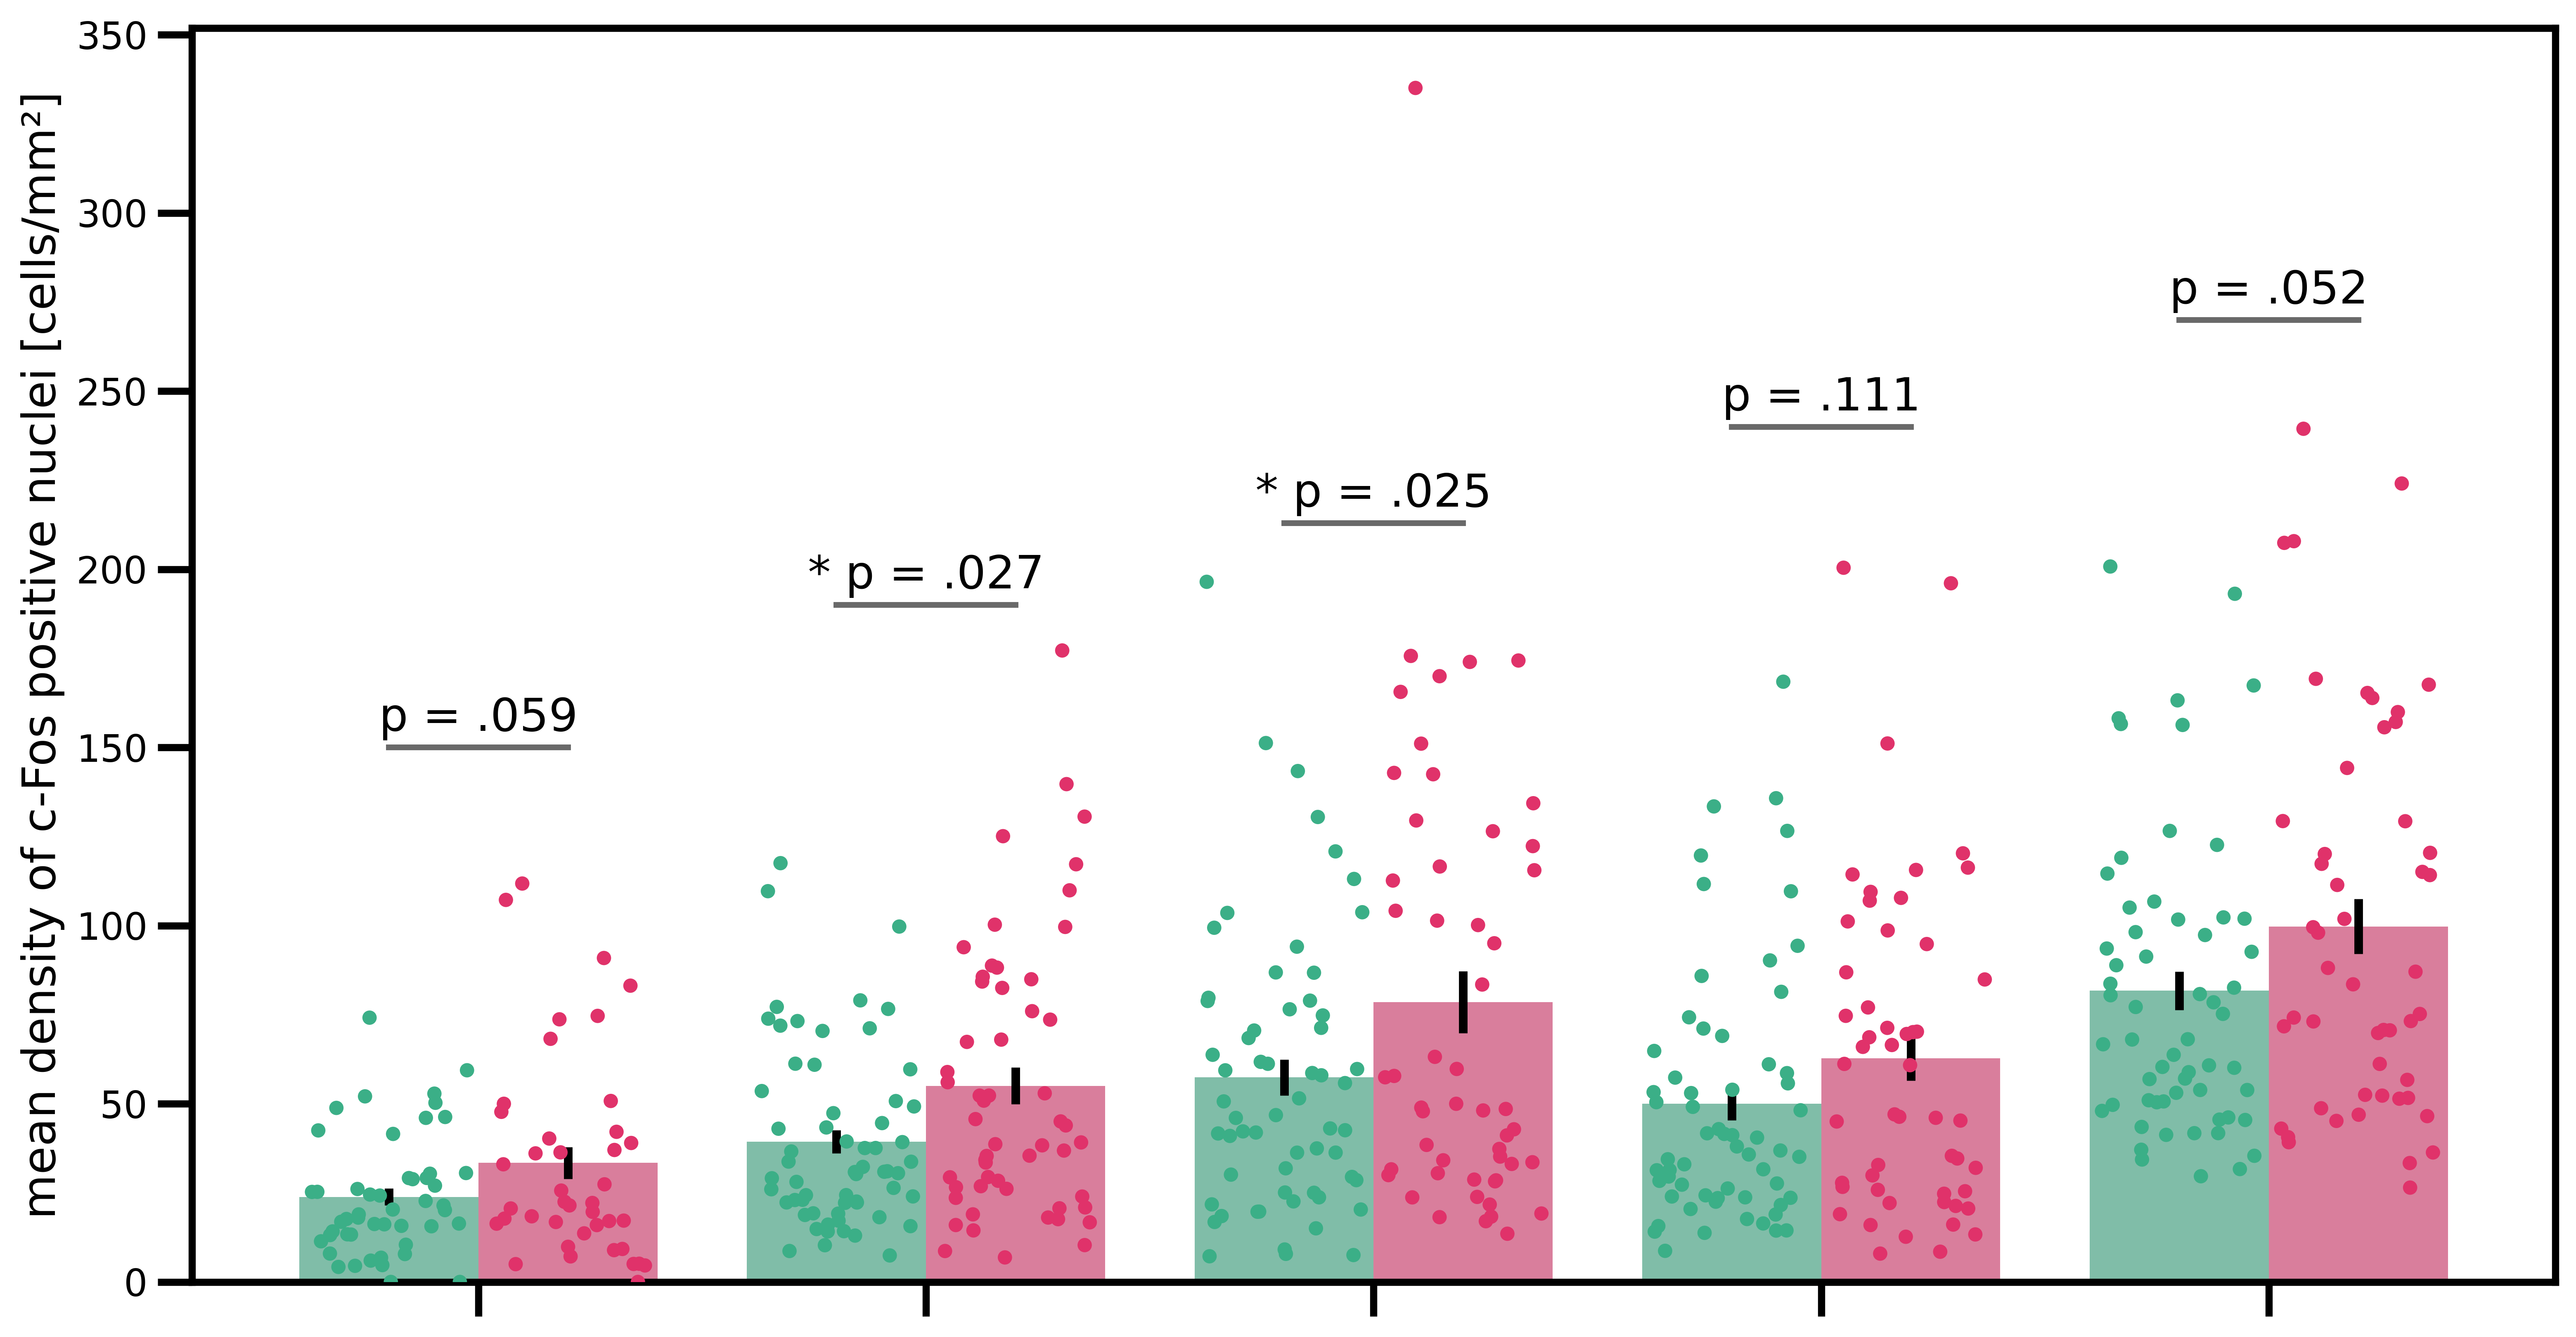

In [55]:
# plot based on data from every single section

plt.figure(figsize=(13, 7), dpi=500)
#plt.figure(figsize=(7, 6), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(["#3BAF87", '#E0326A'])

ax = seaborn.barplot(x="Jądro ciała migdałowatego", y="Gęstość występowania wybarwionych komórek", hue="Grupa", 
                     hue_order = ['gr. kontrolna', 'gr. eksperymentalna'], data=df_plot, palette=pal_1, 
                     errorbar=None, errwidth=1, alpha = 0.7)

seaborn.stripplot(
    x="Jądro ciała migdałowatego", 
    y="Gęstość występowania wybarwionych komórek", 
    hue="Grupa", 
    hue_order = ['gr. kontrolna', 'gr. eksperymentalna'],
    data=df_plot, dodge=True, alpha=1, ax=ax, palette=pal_1, jitter=0.35)


# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, sem_data, fmt=' ', ecolor='black')

#plt.legend(loc="upper left", labels=['CTRL', 'EXP'], fontsize=18)
ax.get_legend().remove() # gdyby chcieć wyrzucić legendę
plt.xlabel("")
plt.ylabel("mean density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=16)
#plt.ylabel("")
plt.xticks(fontsize=16, ticks=[0,1,2,3,4], labels=['', '', '', '', ''])
plt.yticks(fontsize=13, ticks=[0, 50, 100, 150, 200, 250, 300, 350], labels=['0', '50', '100', '150', '200', '250', '300', '350'])

plt.plot([0.8,0.8,1.2,1.2], [190,190,190,190], linewidth=2, color='dimgrey') 
plt.text((1+1)*.5, 190+2, "* p = .027", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([1.8,1.8,2.2,2.2], [213,213,213,213], linewidth=2, color='dimgrey') 
plt.text((2+2)*.5, 213+2, "* p = .025", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([-0.2,-0.2,0.2,0.2], [150,150,150,150], linewidth=2, color='dimgrey') 
plt.text((0+0)*.5, 150+2, "p = .059", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([2.8,2.8,3.2,3.2], [240,240,240,240], linewidth=2, color='dimgrey')
plt.text((3+3)*.5, 240+2, "p = .111", ha='center', va='bottom', color='k', fontsize=16)

plt.plot([3.8,3.8,4.2,4.2], [270,270,270,270], linewidth=2, color='dimgrey')
plt.text((4+4)*.5, 270+2, "p = .052", ha='center', va='bottom', color='k', fontsize=16)

#plt.yticks(np.arange(0,141,20))

#plt.yticks(np.arange (0,131,10))
#ax.set(yticks=[], yticklabels=[])
#ax.tick_params(left=False)

plt.tight_layout()
plt.savefig('wykresy/means_across_nuclei_single_observation_based_ang_2.tiff')
plt.show()

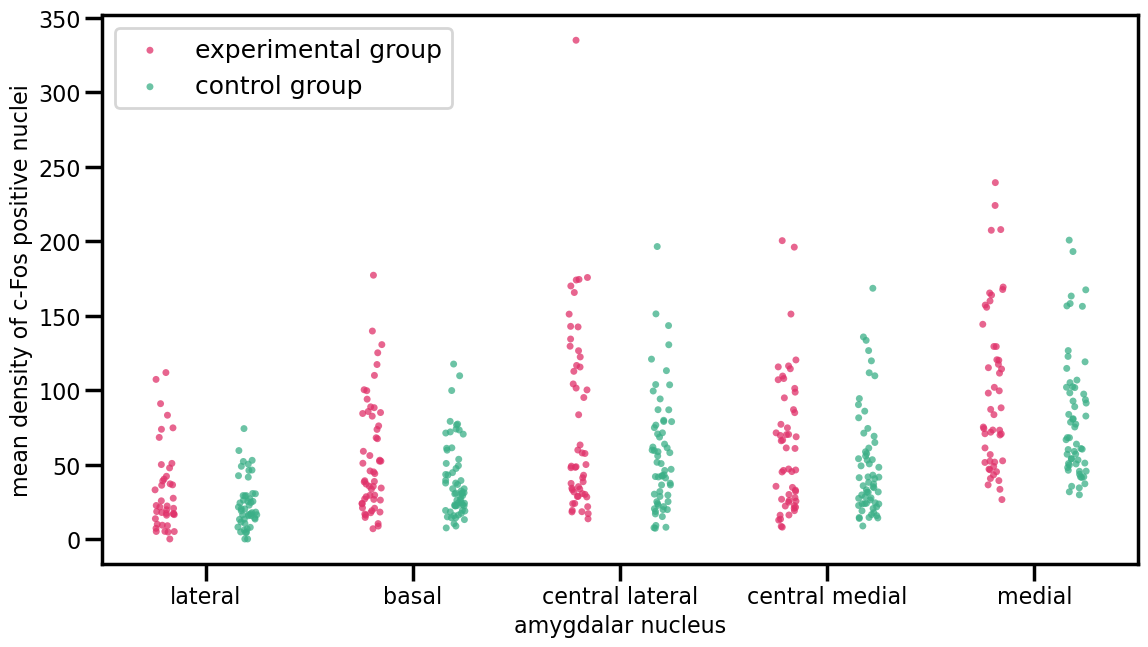

In [53]:
# catplot na podstawie danych z pojedynczych obserwacji - wersja ang

plt.figure(figsize=(12, 7))
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

seaborn.stripplot(x="Jądro ciała migdałowatego", y="Gęstość występowania wybarwionych komórek", hue="Grupa", 
                data=df_plot, palette=pal_1, alpha = 0.75, dodge=True)

plt.legend(loc="upper left", fontsize=18, labels=['experimental group','control group'])
plt.xlabel("amygdalar nucleus", fontsize=16)
plt.ylabel("mean density of c-Fos positive nuclei", fontsize=16)
plt.xticks(fontsize=16, ticks=[0,1,2,3,4], labels=['lateral', 'basal', 'central lateral', 'central medial', 'medial'])
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('wykresy/observations_across_nuclei_single_observation_based_ang.png')
plt.show()

In [31]:
sem_data_allnuclei = df_plot.groupby(["Grupa"])["Gęstość występowania wybarwionych komórek"].sem()
print(sem_data_allnuclei)
reversed_sem_data_allnuclei=list(reversed(sem_data_allnuclei)) #bo chcemy na wykresie mieć najpierw gr. kontrolną
print(reversed_sem_data_allnuclei)

Grupa
gr. eksperymentalna    3.302488
gr. kontrolna          2.242426
Name: Gęstość występowania wybarwionych komórek, dtype: float64
[2.2424262480963835, 3.302487670174778]


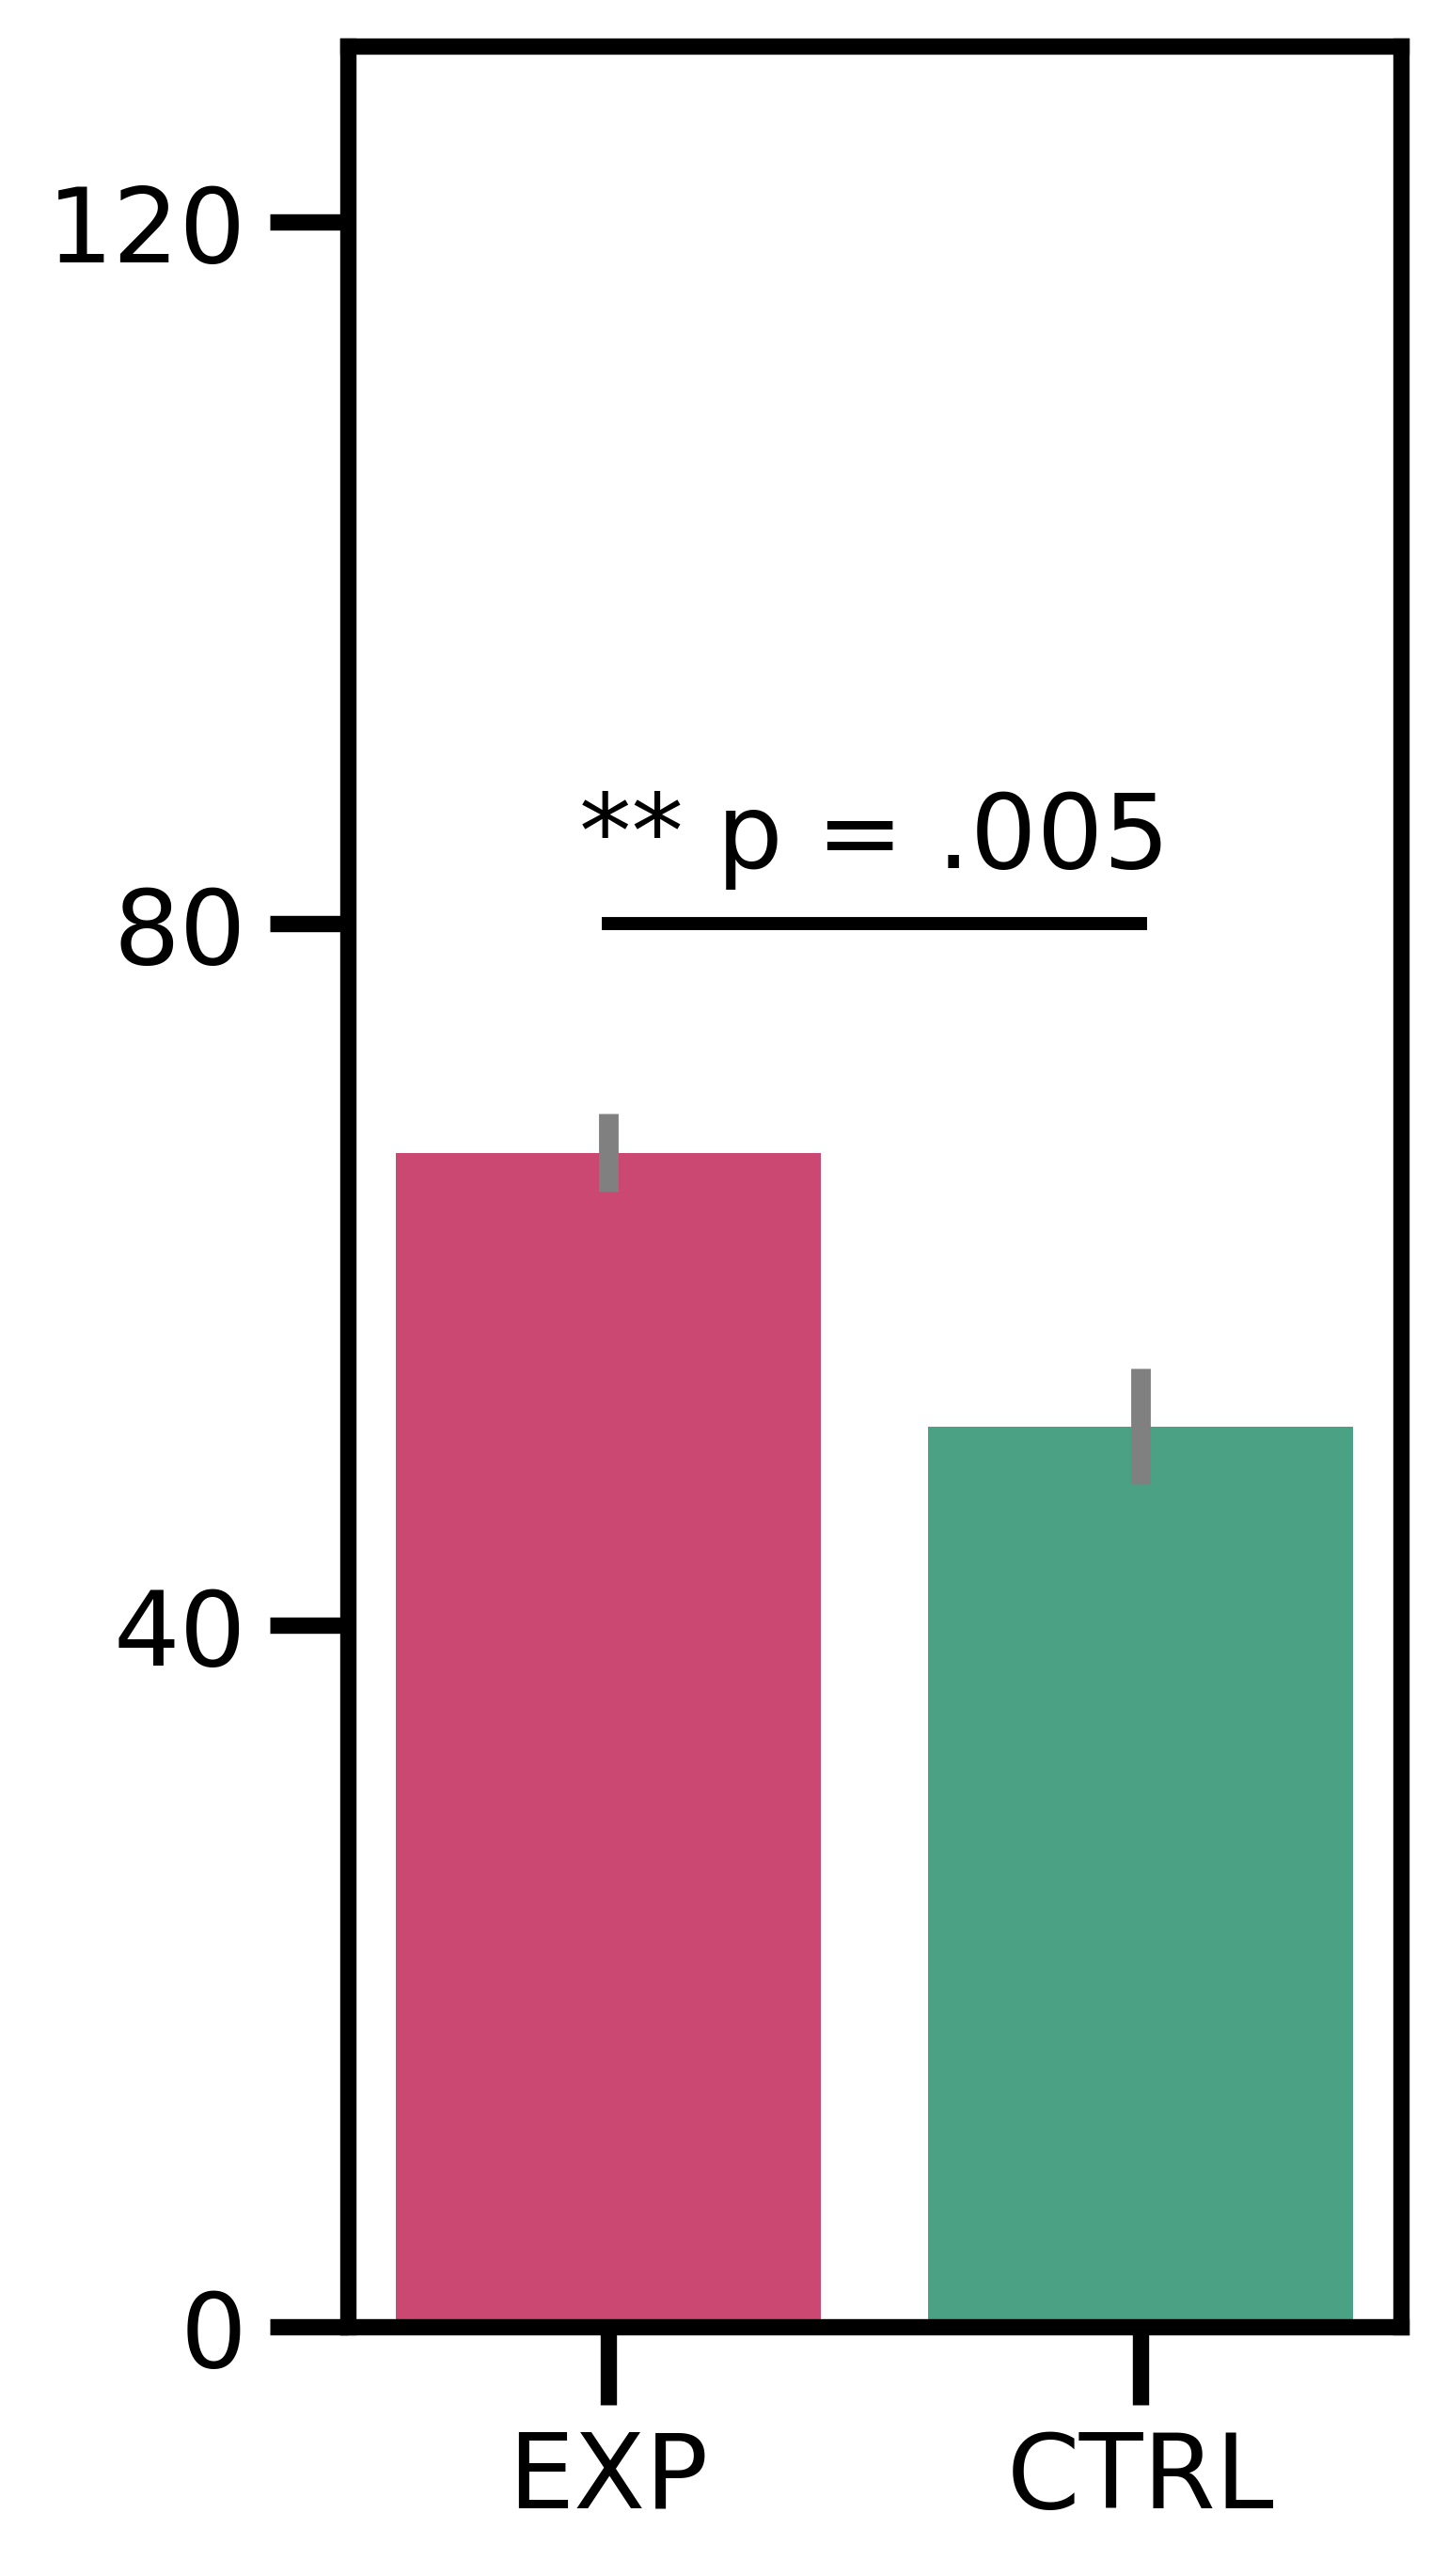

In [32]:
# plot na podstawie danych z pojedynczych obserwacji - ang

plt.figure(figsize=(3.6, 6), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(['#E0326A', "#3BAF87"])

ax = seaborn.barplot(x="Grupa", y="Gęstość występowania wybarwionych komórek", 
                     data=df_plot, order=['gr. eksperymentalna', 'gr. kontrolna'], palette=pal_1, 
                     errorbar=None, errwidth=1)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, reversed_sem_data_allnuclei, fmt=' ', ecolor='grey')

plt.xlabel("")
#plt.ylabel("mean density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=18)
plt.ylabel("")
plt.xticks(fontsize=16, ticks=[0,1], labels=['EXP', 'CTRL'])
plt.yticks(fontsize=16)

plt.plot([0,0,1,1], [80,80,80,80], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text((0+1)*.5, 80+2, "** p = .005", ha='center', va='bottom', color='k', fontsize = 16)

#plt.yticks(np.arange(0,101,20))

plt.yticks(np.arange (0,131,10))
ax.set(yticklabels=[0,'','','',40,'','','',80,'','','',120,''])
ax.set(yticks=[0,40,80,120])

plt.tight_layout()

plt.savefig('wykresy/group_means_single_observation_based_ang.tiff')
plt.show()

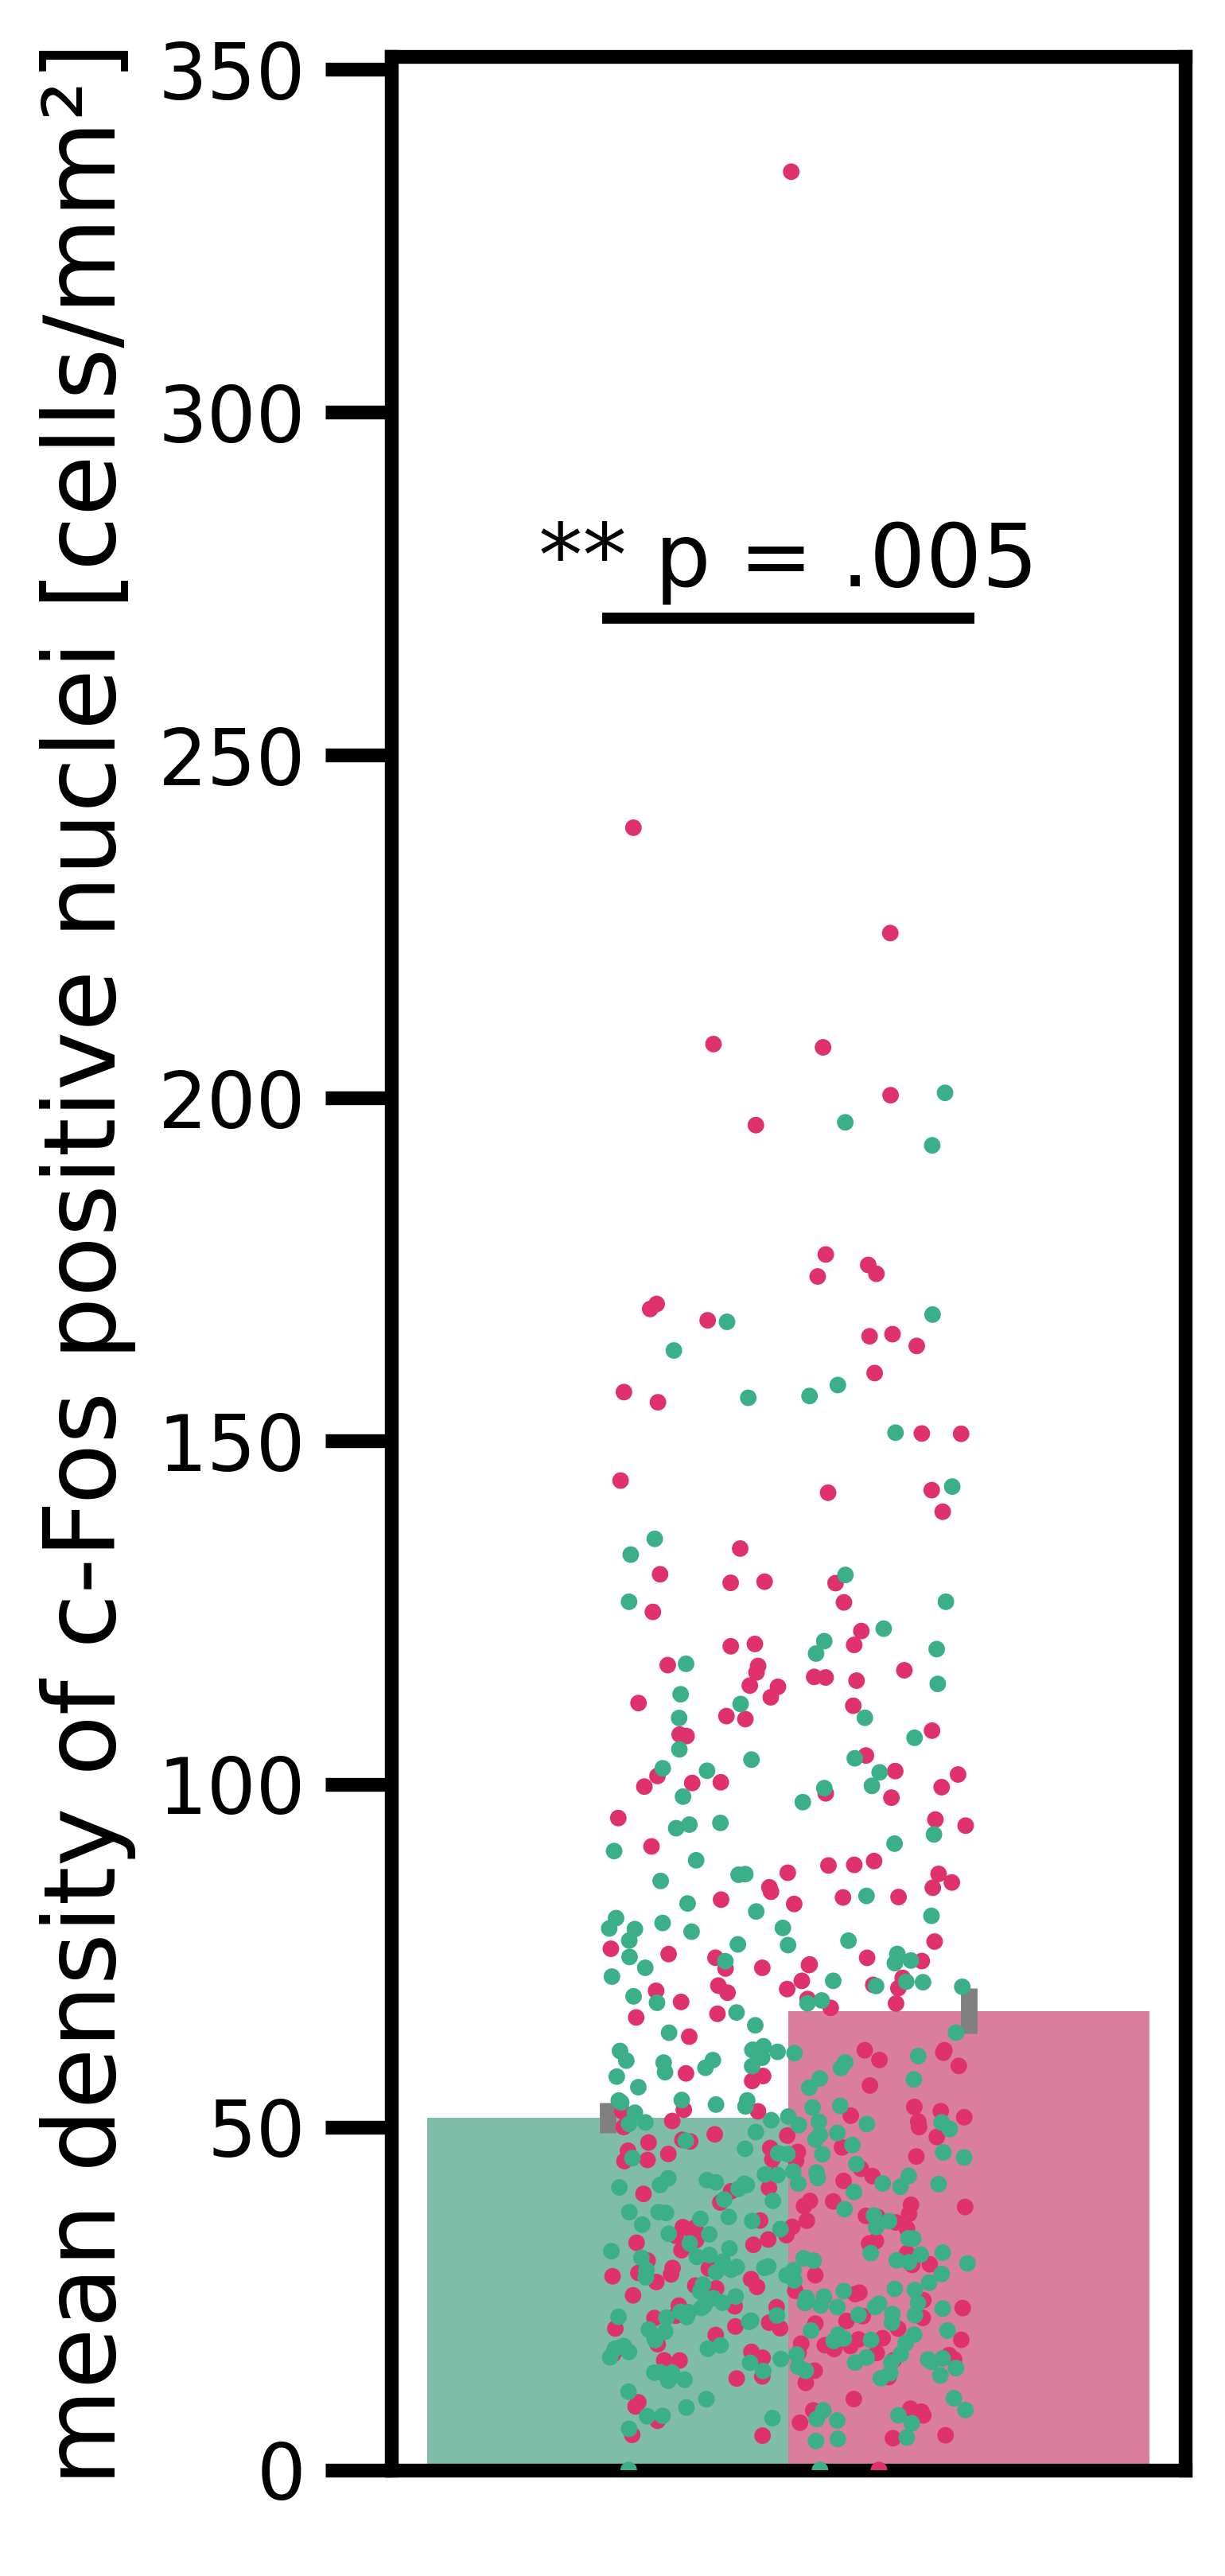

In [33]:
# plot na podstawie danych z pojedynczych obserwacji - ang

plt.figure(figsize=(3.6,7), dpi=500)
seaborn.set_context('poster')
pal_1 = seaborn.color_palette(["#3BAF87", '#E0326A'])

#ax = seaborn.barplot(x="Metoda", y="Gęstość występowania wybarwionych komórek", hue="Grupa", 
#                     data=df_plot, palette=pal_1, errorbar=None, errwidth=1, width=0.4)

ax = seaborn.barplot(x="Metoda", y="Gęstość występowania wybarwionych komórek", hue="Grupa", 
                     hue_order = ['gr. kontrolna', 'gr. eksperymentalna'], data=df_plot, palette=pal_1, 
                     errorbar=None, errwidth=1, alpha = 0.7, width = 0.4)

seaborn.stripplot(
    x="Metoda", 
    y="Gęstość występowania wybarwionych komórek", 
    hue="Grupa", 
    hue_order = ['gr. kontrolna', 'gr. eksperymentalna'],
    data=df_plot, dodge=False, alpha=1, ax=ax, palette=pal_1, jitter=True, size=3)

# get x & height for each container going from left to right
n_containers = len(ax.containers)
n_bars = len(ax.containers[0])
x = []
h = []
for i in range(n_bars):
    for j in range(n_containers):
        x.append(ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2)
        h.append(ax.containers[j][i].get_height())

ax.errorbar(x, h, reversed_sem_data_allnuclei, fmt=' ', ecolor='grey')

ax.get_legend().remove()
#plt.xlabel("whole amygdala", fontsize=16)
plt.xlabel("")
plt.ylabel("mean density of c-Fos positive nuclei [cells/mm\u00b2]".format(area), fontsize=18)
#plt.ylabel("")
plt.xticks(fontsize=16, ticks=[], labels=[])
plt.yticks(fontsize=14)

plt.plot([-0.10,-0.10,0.10,0.10], [270,270,270,270], linewidth=2, color='k') # 0 i 1 to pierwsze dwa elementy na osi x; 80 to wartość osi y
plt.text(0, 270+2, "** p = .005", ha='center', va='bottom', color='k', fontsize = 16)

#plt.yticks(np.arange(0,101,20))

#plt.yticks(np.arange (0,131,10))
#ax.set(yticklabels=[0,'','','',40,'','','',80,'','','',120,''])
#ax.set(yticks=[0,40,80,120])

ax.set(yticks=[0,50,100,150,200,250, 300, 350], yticklabels=['0', '50', '100', '150', '200', '250', '300', '350'])


plt.tight_layout()

plt.savefig('wykresy/group_means_single_observation_based_ang_3.tiff')
plt.show()